## Question Answering Pipeline using DistilBERT

Author: Deepak John Reji (https://www.linkedin.com/in/deepak-john-reji/)

Youtube: https://www.youtube.com/@deepakjohnreji

Question answering (QA) is a natural language processing task in which a computer program is able to understand and respond to questions posed in human language. One common use case for QA systems is in the creation of virtual assistants or chatbots that can assist users by answering questions or providing information.

One important aspect of QA systems is the use of embeddings, which are numerical representations of words or phrases in a continuous vector space. These embeddings capture the semantic relationships between words and can be used to compare the similarity of different words or phrases. In a QA system, embeddings can be used to identify the most relevant information in a large dataset in order to provide a accurate answer to a user's question.

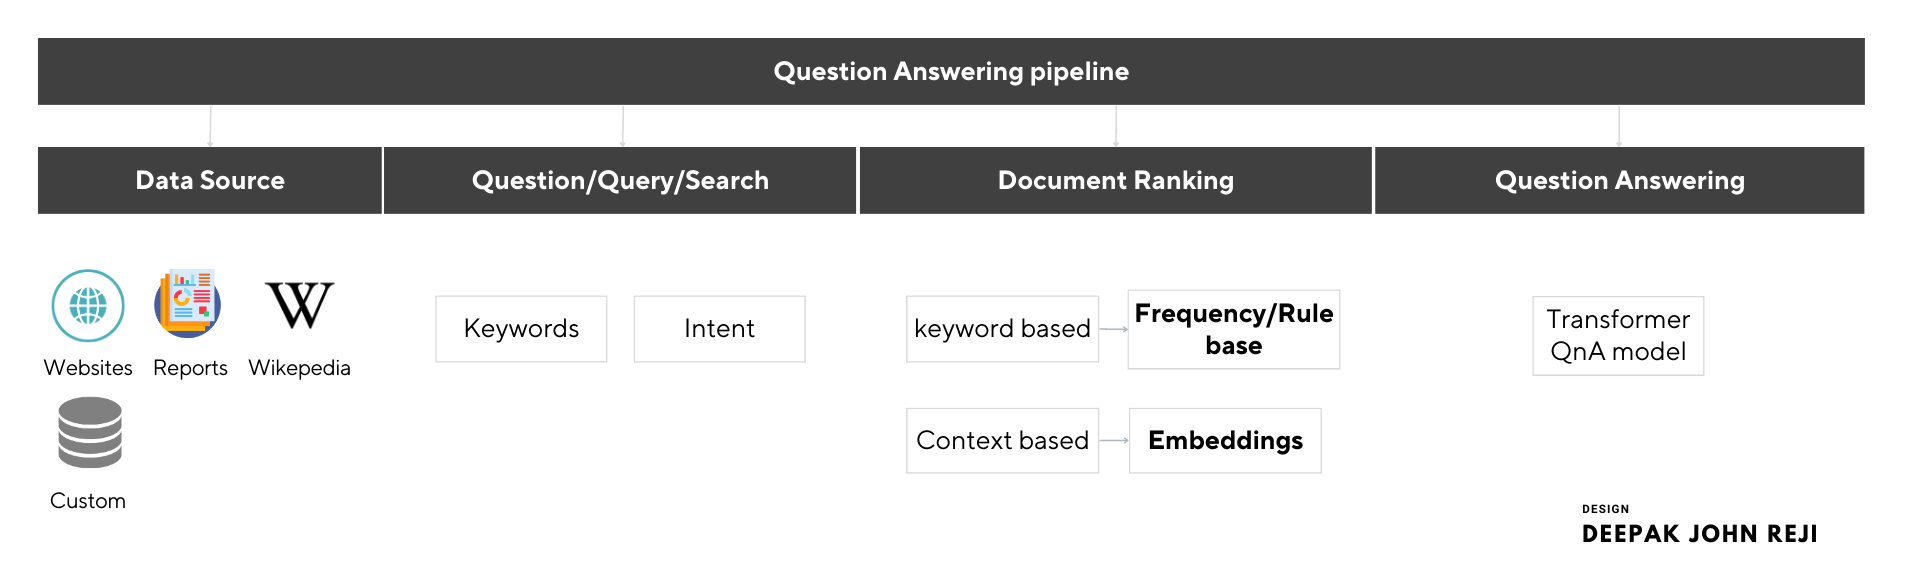

### Data Source

Wikipedia is a free, open-source encyclopedia that is available online and written collaboratively by volunteers around the world. It is a widely used data source for a variety of applications, including natural language processing and machine learning. Wikipedia provides a large and diverse collection of articles on a wide range of topics, making it an ideal resource for training and evaluating machine learning models. In addition, Wikipedia articles are written in a clear and structured manner, which makes it easier to extract relevant information and use it for various tasks. Some common uses of Wikipedia as a data source include information retrieval, question answering, and text classification. Overall, Wikipedia is a valuable resource for anyone looking for high-quality, reliable information on a wide range of topics.

#### 1. Extract the important keywords from the Question

Keyword extraction is the process of automatically identifying and extracting the most important keywords or phrases from a piece of text. This can be useful for tasks such as information retrieval, text classification, and text summarization. One method for keyword extraction is the Rapid Automatic Keyword Extraction (RAKE) algorithm, which is implemented in the rake_nltk package in Python.

In [ ]:
# install rake package
# pip install rake-nltk
# pip install wikipedia

In [1]:
# loading the packages
from rake_nltk import Rake

# keyword extraction function
def keyword_extractor(query):
    """
    Rake has some features:
        1. convert automatically to lower case
        2. extract important key phrases
        3. it will extract combine words also (eg. Deep Learning, Capital City)
    """
    r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.
    r.extract_keywords_from_text(query)
    keywords = r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.
    return keywords

In [2]:
search_string = input("type your question here: ")
keyword_list = keyword_extractor(search_string)

keyword_list

type your question here: who is Billie eilish?


['billie eilish']

#### 2. Data Collection

Collect the data based on the context/keywords extracted from the question

In [3]:
import wikipedia

# data collection using wikepedia
def data_collection(search_words):
    """wikipedia"""
    search_query = ' '.join(search_words)
    wiki_pages = wikipedia.search(search_query, results = 5)
    
    information_list = []
    pages_list = []
    for i in wiki_pages:
        try:
            info = wikipedia.summary(i)
            if any(word in info.lower() for word in search_words):
                information_list.append(info)
                pages_list.append(i)
        except:
            pass
    
    original_info = information_list
    information_list = [item[:1000] for item in information_list] # limiting the word len to 512
    
    return information_list, pages_list, original_info

In [4]:
information, pages, original_data = data_collection(keyword_list)

In [5]:
print(information)

['Billie Eilish Pirate Baird O\'Connell ( EYE-lish; born December 18, 2001) is an American singer-songwriter. She first gained public attention in 2015 with her debut single "Ocean Eyes", written and produced by her brother Finneas O\'Connell, with whom she collaborates on music and live shows. In 2017, she released her debut extended play (EP), titled Don\'t Smile at Me. Commercially successful, it reached the top 15 of record charts in numerous countries, including the US, UK, Canada, and Australia.\nEilish\'s first studio album, When We All Fall Asleep, Where Do We Go? (2019), debuted atop the US Billboard 200 and UK Albums Chart. It was one of the best-selling albums of the year, buoyed by the success of its fifth single "Bad Guy", Eilish\'s first number-one on the US Billboard Hot 100. This made her the first artist born in the 21st century to release a chart-topping single. The following year, Eilish performed the theme song "No Time to Die" for the James Bond film of the same na

In [6]:
print(pages)

['Billie Eilish', 'Billie Eilish discography', 'Bad Guy (Billie Eilish song)', 'Happier Than Ever', 'Billie Eilish (song)']


In [7]:
print(original_data)

['Billie Eilish Pirate Baird O\'Connell ( EYE-lish; born December 18, 2001) is an American singer-songwriter. She first gained public attention in 2015 with her debut single "Ocean Eyes", written and produced by her brother Finneas O\'Connell, with whom she collaborates on music and live shows. In 2017, she released her debut extended play (EP), titled Don\'t Smile at Me. Commercially successful, it reached the top 15 of record charts in numerous countries, including the US, UK, Canada, and Australia.\nEilish\'s first studio album, When We All Fall Asleep, Where Do We Go? (2019), debuted atop the US Billboard 200 and UK Albums Chart. It was one of the best-selling albums of the year, buoyed by the success of its fifth single "Bad Guy", Eilish\'s first number-one on the US Billboard Hot 100. This made her the first artist born in the 21st century to release a chart-topping single. The following year, Eilish performed the theme song "No Time to Die" for the James Bond film of the same na

#### 3. Document Ranking

The BM25 ranking formula is based on the frequency of the query terms in the document, the length of the document, and the overall frequency of the query terms in the collection of documents. The formula assigns a score to each document based on these factors, with higher scores indicating a higher degree of relevance.

In [8]:
from rank_bm25 import BM25Okapi

# document ranking function
def document_ranking(documents, query, n):
    """BM25"""
    try:
        tokenized_corpus = [doc.split(" ") for doc in documents]
        bm25 = BM25Okapi(tokenized_corpus)
        tokenized_query = query.split(" ")
        doc_scores = bm25.get_scores(tokenized_query)
        datastore = bm25.get_top_n(tokenized_query, documents, n)
    except:
        pass
    return datastore

In [9]:
datastore = document_ranking(information, search_string, 3)
datastore

["Happier Than Ever is the second studio album by American singer Billie Eilish, released by Darkroom and Interscope Records on July 30, 2021. Eilish co-wrote the album with her brother Finneas O'Connell, her frequent collaborator who also produced the album and played every instrument. Eilish cited self-reflection during the COVID-19 pandemic as the biggest inspiration for the LP.\nPrimarily a downtempo pop record, Happier Than Ever is characterized by sparse, jazz-influenced, electropop arrangements set to meditative tempos, departing from the upbeat, trap-led sound of Eilish's debut album, When We All Fall Asleep, Where Do We Go? (2019). Consisting of torch songs about the downsides of stardom, Happier Than Ever draws heavily from Eilish's rise to fame and the drawbacks that come with it. Upon release, the album received acclaim from music critics, who praised its stylistic, restrained production, and insightful lyrics. At the 64th Annual Grammy Awards, the album and its title track

#### 4. Question Answering

One approach to QA is to use a large language model such as DistilBERT, which is a pre-trained transformer model developed by Hugging Face. To use DistilBERT for QA, you can generate embeddings for your data using the model and then use a similarity measure to compare the embeddings of the user's question to the embeddings of the potential answers in your dataset. Based on the similarity scores, you can select the most similar answer as the predicted answer to the user's question. DistilBERT is a powerful and widely-used tool for QA and can be used in a variety of applications.

In [10]:
import torch
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering

def answergen(context, question):
    """DistilBert"""
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased',return_token_type_ids = True)
    model = DistilBertForQuestionAnswering.from_pretrained('distilbert-base-uncased-distilled-squad', return_dict=False)
    encoding = tokenizer.encode_plus(question, context)
    input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]
    start_scores, end_scores = model(torch.tensor([input_ids]), attention_mask=torch.tensor([attention_mask]))
    ans_tokens = input_ids[torch.argmax(start_scores) : torch.argmax(end_scores)+1]
    answer_tokens = tokenizer.convert_ids_to_tokens(ans_tokens , skip_special_tokens=True)
    answer_tokens_to_string = tokenizer.convert_tokens_to_string(answer_tokens)

    return answer_tokens_to_string

answers_list = []    

for i in range(len(datastore)):
    result = answergen(datastore[i], search_string)
    answers_list.append(result)

answers_list

['singer', 'singer - songwriter', 'singer and songwriter']